In [2]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [3]:
# importing the libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset_cotton/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset_cotton/Dataset/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [14]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset_cotton/Dataset/train/*')
print(len(folders))

4


In [15]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [18]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_cotton/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_cotton/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-25-1b4640f8339a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
61/61 [==============================] - 384s 6s/step - loss: 2.8248 - accuracy: 0.7217 - val_loss: 0.6209 - val_accuracy: 0.7778
Epoch 2/25
61/61 [==============================] - 38s 617ms/step - loss: 0.9109 - accuracy: 0.8708 - val_loss: 0.1558 - val_accuracy: 0.9444
Epoch 3/25
61/61 [==============================] - 40s 658ms/step - loss: 0.5858 - accuracy: 0.9088 - val_loss: 0.5916 - val_accuracy: 0.8333
Epoch 4/25
61/61 [==============================] - 40s 648ms/step - loss: 0.4348 - accuracy: 0.9262 - val_loss: 0.7916 - val_accuracy: 0.8889
Epoch 5/25
61/61 [==============================] - 39s 641ms/step - loss: 0.4930 - accuracy: 0.9159 - val_loss: 0.1656 - val_accuracy: 0.9444
Epoch 6/25
61/61 [==============================] - 40s 660ms/step - loss: 0.4952 - accuracy: 0.9303 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/25
61/61 [==============================] - 41s 662ms/step - loss: 0.5502 - accuracy: 0.9288 - val_loss: 0.0037 - val_accuracy: 1.0000
E

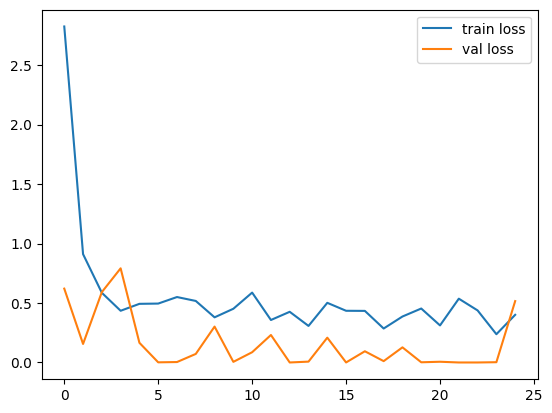

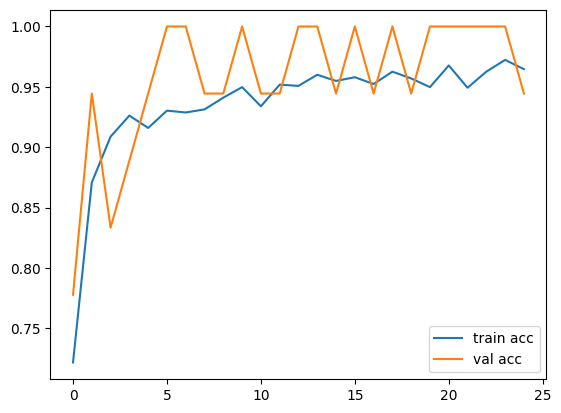

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from keras.models import load_model

model.save('model_inception.h5')

In [30]:
y_pred = model.predict(test_set)
y_pred

1/1 [==============================] - 3s 3s/step


array([[2.0558255e-13, 7.9225374e-19, 1.0000000e+00, 1.3249320e-14],
       [0.0000000e+00, 3.2402612e-14, 0.0000000e+00, 1.0000000e+00],
       [8.0605765e-18, 1.0924407e-09, 5.9304174e-29, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 9.5016972e-34, 4.0242983e-35],
       [5.6104484e-22, 9.8935340e-04, 6.6228389e-22, 9.9901056e-01],
       [4.4521520e-18, 1.6775310e-14, 1.0000000e+00, 3.5427112e-23],
       [1.0000000e+00, 1.2598391e-22, 6.3457851e-28, 3.7201602e-37],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.2243889e-34],
       [1.0113554e-16, 2.9862258e-01, 3.7683691e-21, 7.0137745e-01],
       [3.3077550e-23, 0.0000000e+00, 1.0000000e+00, 1.3677518e-36],
       [4.4758654e-29, 1.0000000e+00, 5.1722524e-27, 1.6458151e-11],
       [9.9986804e-01, 1.3899243e-20, 1.3195236e-04, 1.6479949e-22],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.4316747e-25],
       [1.4776645e-34, 1.0000000e+00, 6.1941095e-34, 2.0468570e-21],
       [3.3068189e-17, 9.9835348e-

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([2, 3, 3, 0, 3, 2, 0, 1, 3, 2, 1, 0, 1, 1, 2, 3, 0, 1])

In [35]:


#calling model for prediction
from keras.models import load_model
from keras.preprocessing import image

In [64]:
model=load_model('model_inception.h5')

In [54]:
img=image.load_img('/content/drive/MyDrive/Dataset_cotton/Dataset/val/fresh cotton plant/dsd (172)_iaip.jpg',target_size=(224,224))

In [55]:
#parameter taken by  predict method is NUMPY

x=image.img_to_array(img)
x

array([[[ 32.,  30.,  18.],
        [ 32.,  30.,  18.],
        [ 35.,  33.,  21.],
        ...,
        [ 55.,  54.,  34.],
        [ 56.,  53.,  34.],
        [ 91.,  86.,  67.]],

       [[ 32.,  30.,  18.],
        [ 32.,  30.,  18.],
        [ 35.,  33.,  21.],
        ...,
        [ 41.,  59.,  21.],
        [ 42.,  58.,  21.],
        [ 59.,  73.,  37.]],

       [[ 32.,  30.,  18.],
        [ 32.,  30.,  18.],
        [ 35.,  33.,  21.],
        ...,
        [ 69., 104.,  50.],
        [ 62.,  95.,  42.],
        [ 68.,  98.,  46.]],

       ...,

       [[ 55.,  63.,  65.],
        [ 55.,  63.,  65.],
        [ 52.,  60.,  62.],
        ...,
        [ 39.,  82.,  26.],
        [ 65., 108.,  52.],
        [ 41.,  84.,  28.]],

       [[ 55.,  63.,  65.],
        [ 55.,  63.,  65.],
        [ 52.,  60.,  62.],
        ...,
        [ 37.,  80.,  24.],
        [ 45.,  88.,  32.],
        [ 64., 107.,  51.]],

       [[ 55.,  63.,  65.],
        [ 55.,  63.,  65.],
        [ 52.,  

In [56]:
x.shape

(224, 224, 3)

In [57]:
x=x/255

In [58]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [59]:
model.predict(img_data)

1/1 [==============================] - 0s 34ms/step


array([[9.9991345e-01, 4.6501533e-05, 1.8757541e-07, 3.9891944e-05]],
      dtype=float32)

In [51]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 28ms/step


In [52]:
a

array([0])